In [21]:
import numpy as np
import matplotlib.pyplot as plt
import skrf as rf
from skrf.media import *
from skrf import Frequency
import json

[link to page about SMA geometry](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=2888)

[link to coax media object doc page](https://scikit-rf.readthedocs.io/en/latest/api/media/generated/skrf.media.coaxial.Coaxial.html#skrf.media.coaxial.Coaxial)

 - outer diameter = 2.6 mm
 - inner diameter = 0.5 mm
 - teflon dielectric constant = 2.1

In [37]:
f_coax = Frequency(4, 9, 1601, 'GHz')
fghz = f_coax.f/1e9
coax = coaxial.Coaxial(f_coax,Dint=0.0005,Dout=0.001675,epsilon_r=2.1,sigma=1.2e7,z0_port=50)


In [24]:
coax_10mm = coax.line(100, unit = 'mm')

In [25]:
coax_10mm

2-Port Network: '',  4.0-9.0 GHz, 1601 pts, z0=[50.+0.j 50.+0.j]

In [26]:
sopen = f_coax.f*0j + 1

In [28]:
open_network = rf.Network(frequency=f_coax, s=sopen, z0=50)

In [31]:
coax_open = coax_10mm**open_network

Text(0, 0.5, '$S_{11}$ phase [deg]')

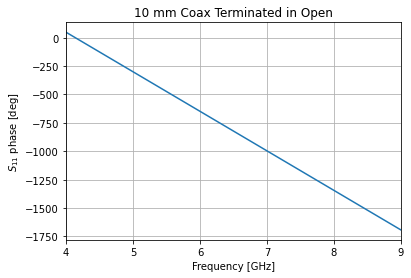

In [44]:
plt.plot(fghz,coax_open.s_deg_unwrap[:,:,0])
plt.xlim(fghz[0],fghz[len(fghz) - 1])
plt.grid()
plt.title("10 mm Coax Terminated in Open")
plt.xlabel("Frequency [GHz]")
plt.ylabel("$S_{11}$ phase [deg]")